#### 주가예측 모델(GRU)

In [ ]:
# 증권데이터 수집 라이브러리 설치 :  pip install yfinance 2가지 프로젝트 : 딥러닝,팀프로젝트
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [21]:
# 1. 데이터 수집
ticker = "AAPL"  # 애플 주식
data = yf.download(ticker, start="2015-01-01", end="2024-01-01")
data = data[['Close']]  # 종가 데이터만 사용

[*********************100%***********************]  1 of 1 completed


In [9]:
# 2. 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))  # 데이터를 0~1 사이로 정규화
scaled_data = scaler.fit_transform(data)

In [22]:
def create_dataset(dataset, look_back=60):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i + look_back, 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

In [23]:
look_back = 60  # 과거 60일 데이터로 예측
X, y = create_dataset(scaled_data, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))   # LSTM 입력 형태

In [24]:
# 3. 모델 구성
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(50),
    Dense(1)
])

c:\ai_files\dl_Study\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
# 4. 모델 학습
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [31]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 2.4068e-04 - val_loss: 7.8099e-04
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1.8476e-04 - val_loss: 8.1480e-04
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 2.2077e-04 - val_loss: 5.7746e-04
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 2.1297e-04 - val_loss: 9.5147e-04
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 2.3623e-04 - val_loss: 5.9642e-04
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 2.2747e-04 - val_loss: 6.0262e-04
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 1.9151e-04 - val_loss: 9.7004e-04
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 3.2462e-04 - val_loss: 5.1297e-04
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 1.8179e-04 - val_loss: 8.2588e-04
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.6601e-04 - val_loss: 6.7642e-04


In [32]:
# 5. 예측 및 시각화
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1)) # x축 features인 -1은 가져오지 말고 x와 짝지어 있는 y축의 열 데이터만 가져와라

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [33]:
# 실제 값 복원
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1)) # inverse_transform : 원래의 수치 표현으로 다시 변환시켜주는 코드

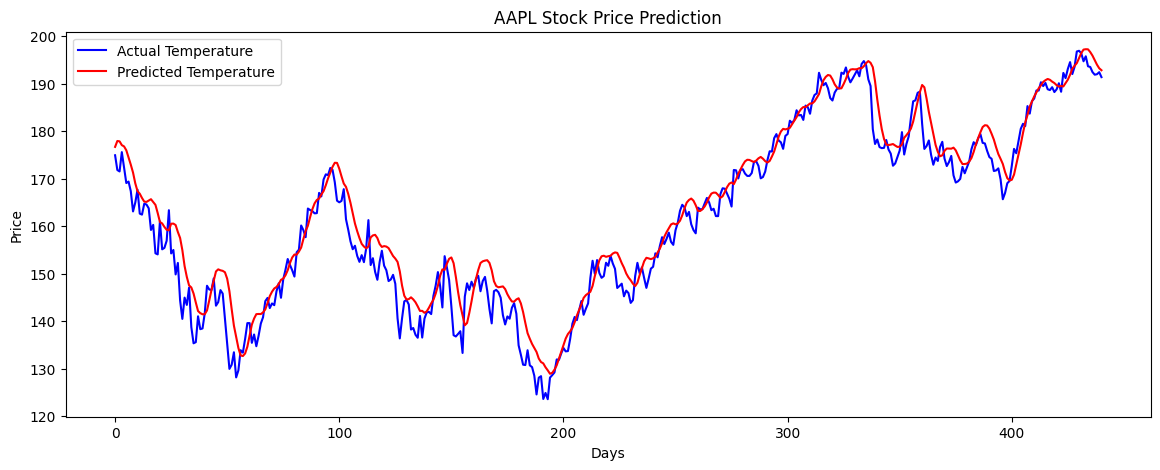

In [34]:
# 6. 시각화
plt.figure(figsize=(14, 5))
plt.plot(actual_prices, label="Actual Temperature", color='blue')
plt.plot(predictions, label="Predicted Temperature", color='red')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()